In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy.typing import NDArray
from matplotlib.patches import Rectangle  


In [12]:
csv_file_path = 'data_6_channels_train.csv'  
df = pd.read_csv(csv_file_path, header=0)

In [92]:

# NDVI: Index für "Greeness" zzwischen -1 und 1
# > 0.3 bis +1: Gesunde Vegetation (je höher, desto grüner/dichter). 
df['NDVI'] = (df['NIR'] - df['RED']) / (df['NIR'] + df['RED'])

# NBR: Index für Trockenheit/Brandflächen zwischen -1 und +1
# -0.1 bis +0.1: Trockene/Brandflächen (SWIR dominiert).
#-1 bis -0.2: Wasser/Schatten (niedrige Reflexion in NIR und SWIR)
df['NBR'] = (df['NIR'] - df['SW2']) / (df['NIR'] + df['SW2'])

# Veränderung der NBR (Brandstärke) siehe: https://un-spider.org/sites/default/files/table+legend.PNG
df["dNBR"] = df["NBR"].shift(1) - df["NBR"]

bins = [-float("inf"), -0.251, -0.101, 0.099, 0.269, 0.439, 0.659, float("inf")]
labels = [
    "Enhanced Regrowth, high (post-fire)",
    "Enhanced Regrowth, low (post-fire)",
    "Unburned",
    "Low Severity",
    "Moderate-low Severity",
    "Moderate-high Severity",
    "High Severity"
]

# Kategorie-Spalte erstellen
df["Severity_Level"] = pd.cut(
    df["dNBR"],
    bins=bins,
    labels=labels,
    right=False  
)



In [106]:
sonderfälle = df[(df['Severity_Level'] == 'Unburned') & (df['class'] == 1)]
print(sonderfälle)

           fid  year  class  numerical_id    BLU     GRN     RED     NIR  \
1810      2116  1993      1           142  672.0  1361.0  1608.0  3277.0   
2226      2702  2001      1           157  183.0   561.0   547.0  3081.0   
3262      4248  2017      1           196  364.0   611.0   581.0  3577.0   
4643      5901  2004      1           239  488.0   696.0   601.0  3069.0   
8985     11841  1995      1           396  377.0   737.0   916.0  2853.0   
...        ...   ...    ...           ...    ...     ...     ...     ...   
439487  627806  1998      1         19431  883.0  1218.0  1459.0  2262.0   
440207  628798  2004      1         19457  191.0   308.0   215.0  1785.0   
440230  628855  1993      1         19318  508.0   724.0   617.0  2352.0   
440623  629418  2012      1         19473  807.0  1145.0  1395.0  2326.0   
449399  644335  1986      1         19905  499.0   800.0   617.0  2457.0   

           SW1     SW2      NDVI       NBR  5_year_interval  year_interval  \
1810    3

In [109]:
# Zusammenfassende Statistiken für alle Kategorien in Severity_Level
severity_summary = df.groupby('Severity_Level').agg(
    count=('class', 'count'),
    mean_class=('class', 'mean'),
    std_class=('class', 'std'),
    min_class=('class', 'min'),
    max_class=('class', 'max'),
    mean_BLU=('BLU', 'mean'),
    std_BLU=('BLU', 'std'),
    min_BLU=('BLU', 'min'),
    max_BLU=('BLU', 'max'),
    mean_SW1=('SW1', 'mean'),
    std_SW1=('SW1', 'std'),
    min_SW1=('SW1', 'min'),
    max_SW1=('SW1', 'max')
).reset_index()

print("Zusammenfassende Statistiken für Severity_Level:")
print(severity_summary)

# Zusammenfassende Statistiken für sonderfälle
sonderfälle_summary = sonderfälle.describe(include='all')

print("\nZusammenfassende Statistiken für Sonderfälle:")
df.sonderfälle_summary = sonderfälle.describe(include='all')

Zusammenfassende Statistiken für Severity_Level:
                        Severity_Level   count  mean_class  std_class  \
0  Enhanced Regrowth, high (post-fire)    2138    0.000000   0.000000   
1   Enhanced Regrowth, low (post-fire)   19473    0.000051   0.007166   
2                             Unburned  408767    0.000284   0.016843   
3                         Low Severity   20187    0.042354   0.201400   
4                Moderate-low Severity    2353    0.249894   0.433043   
5               Moderate-high Severity     627    0.403509   0.490993   
6                        High Severity     114    0.464912   0.500969   

   min_class  max_class    mean_BLU     std_BLU  min_BLU  max_BLU  \
0          0          0  369.357905  145.462232     -4.0   1272.0   
1          0          1  330.988996  139.711760   -188.0   1924.0   
2          0          1  290.740104  121.334212   -416.0   2603.0   
3          0          1  409.357557  181.160078    -99.0   2796.0   
4          0         

C:\Users\thoma\AppData\Local\Temp\ipykernel_28232\131370423.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  severity_summary = df.groupby('Severity_Level').agg(
C:\Users\thoma\AppData\Local\Temp\ipykernel_28232\131370423.py:25: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.sonderfälle_summary = sonderfälle.describe(include='all')


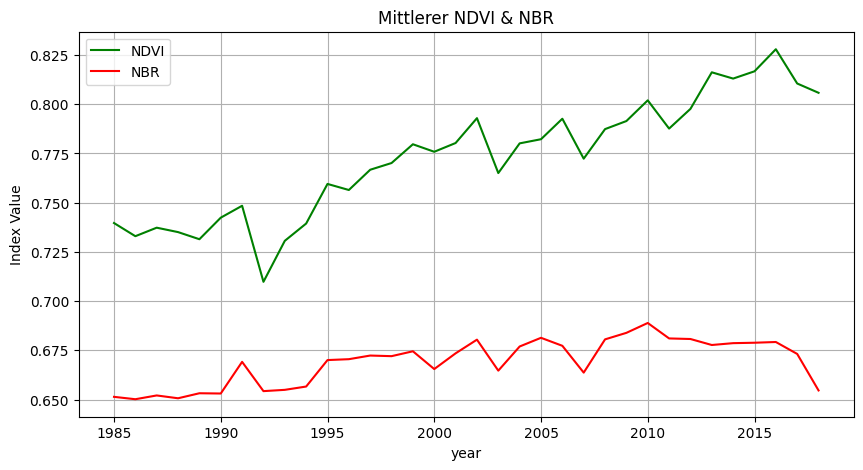

In [96]:
plt.figure(figsize=(10, 5))
df.groupby('year')['NDVI'].mean().plot(title='Mittlerer NDVI & NBR', color='green')
df.groupby('year')['NBR'].mean().plot(color='red', label='NBR')

plt.ylabel('Index Value')
plt.legend()
plt.grid()
plt.show()

C:\Users\thoma\AppData\Local\Temp\ipykernel_28232\1944216686.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  severity_avg_class = df.groupby('Severity_Level')['class'].mean().reset_index()
C:\Users\thoma\AppData\Local\Temp\ipykernel_28232\1944216686.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=severity_avg_class, x='Severity_Level', y='class', palette='viridis')


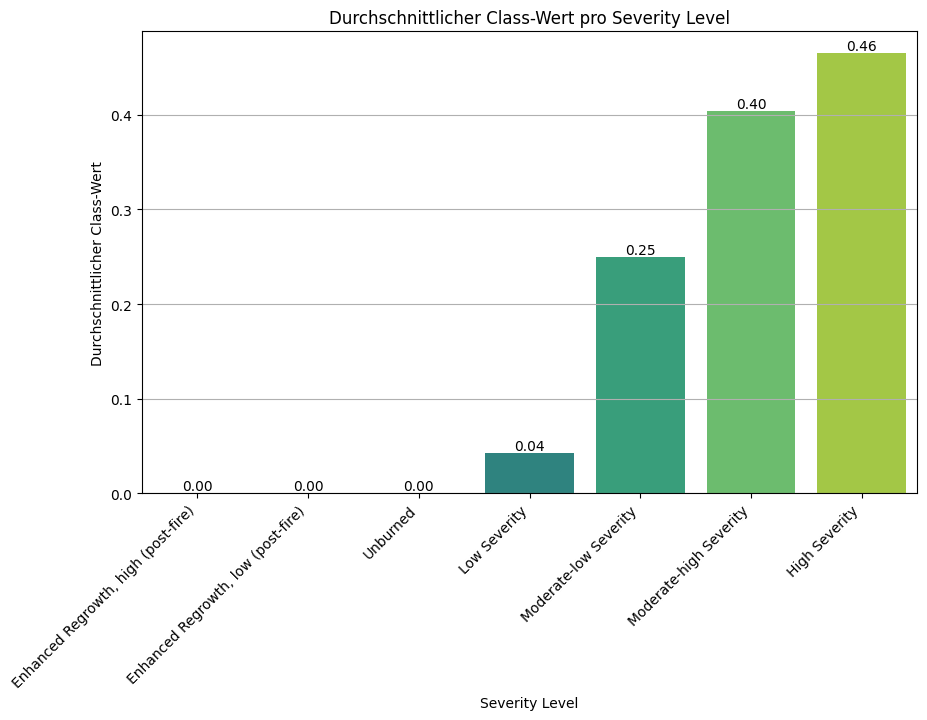

In [98]:
# Durchschnittliche class-Werte pro Severity_Level berechnen
severity_avg_class = df.groupby('Severity_Level')['class'].mean().reset_index()

# Barchart erstellen
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=severity_avg_class, x='Severity_Level', y='class', palette='viridis')

# Werte über den Balken anzeigen
for bar in barplot.patches:
    barplot.annotate(format(bar.get_height(), '.2f'),
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                     ha='center', va='bottom', fontsize=10)

plt.title('Durchschnittlicher Class-Wert pro Severity Level')
plt.xlabel('Severity Level')
plt.ylabel('Durchschnittlicher Class-Wert')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()


In [99]:
# Zusammenfassende Statistiken für Severity_Level und class
severity_class_summary = df.groupby('Severity_Level')['class'].agg(['mean', 'std', 'min', 'max', 'count']).reset_index()

# Ergebnis anzeigen
print(severity_class_summary)

                        Severity_Level      mean       std  min  max   count
0  Enhanced Regrowth, high (post-fire)  0.000000  0.000000    0    0    2138
1   Enhanced Regrowth, low (post-fire)  0.000051  0.007166    0    1   19473
2                             Unburned  0.000284  0.016843    0    1  408767
3                         Low Severity  0.042354  0.201400    0    1   20187
4                Moderate-low Severity  0.249894  0.433043    0    1    2353
5               Moderate-high Severity  0.403509  0.490993    0    1     627
6                        High Severity  0.464912  0.500969    0    1     114


C:\Users\thoma\AppData\Local\Temp\ipykernel_28232\1929511190.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  severity_class_summary = df.groupby('Severity_Level')['class'].agg(['mean', 'std', 'min', 'max', 'count']).reset_index()


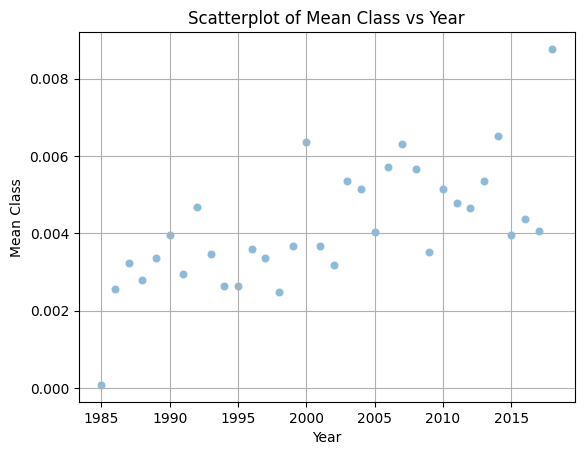

In [ ]:
mean_class_by_year = df.groupby('year')['class'].mean().reset_index()
sns.scatterplot(data=mean_class_by_year, x='year', y='class', alpha=0.5)
plt.title('Scatterplot of Mean Class vs Year')
plt.xlabel('Year')
plt.ylabel('Mean Class')
plt.grid(True)
plt.show()

In [29]:
# 5-Jahres-Intervall berechnen
df['year_interval'] = df['year'] - (df['year'] % 5)

# Gruppieren nach 5-Jahres-Intervallen und Berechnung der Statistiken
summary_table = df.groupby('5_year_interval').agg(
    NDVI_mean=('NDVI', 'mean'),
    NDVI_std=('NDVI', 'std'),
    NDVI_min=('NDVI', 'min'),
    NDVI_max=('NDVI', 'max'),
    NBR_mean=('NBR', 'mean'),
    NBR_std=('NBR', 'std'),
    NBR_min=('NBR', 'min'),
    NBR_max=('NBR', 'max'),
    class_mean=('class', 'mean'),
    class_std=('class', 'std'),
    class_min=('class', 'min'),
    class_max=('class', 'max')
).reset_index()

print(summary_table)

   5_year_interval  NDVI_mean  NDVI_std  NDVI_min  NDVI_max  NBR_mean  \
0             1985   0.735257  0.105413 -0.127660  0.953002  0.651525   
1             1990   0.734142  0.104410 -0.154717  0.950709  0.657633   
2             1995   0.766510  0.098848 -0.129412  0.964240  0.671919   
3             2000   0.778844  0.098122 -0.326531  0.971711  0.672218   
4             2005   0.785215  0.094404 -0.194690  0.965066  0.677379   
5             2010   0.803331  0.091160 -4.176471  1.053318  0.681429   
6             2015   0.816884  0.093373 -0.595745  1.196721  0.673916   

    NBR_std   NBR_min   NBR_max  class_mean  class_std  class_min  class_max  
0  0.124192 -0.608735  0.971711    0.002428   0.049217          0          1  
1  0.124201 -0.255245  0.940532    0.003535   0.059354          0          1  
2  0.115059 -0.339564  0.990857    0.003150   0.056035          0          1  
3  0.114017 -0.235343  1.024793    0.004739   0.068681          0          1  
4  0.109200 -0.48802

In [59]:
# Korrelationsmatrix berechnen
correlation_matrix = df[['NBR', 'NDVI', 'class', 'SW1', 'BLU', 'GRN', 'RED', 'SW1', 'SW2']].corr()

# Korrelationsmatrix anzeigen
print(correlation_matrix)

            NBR      NDVI     class       SW1       BLU       GRN       RED  \
NBR    1.000000  0.784853 -0.183733 -0.561793 -0.502528 -0.605613 -0.766324   
NDVI   0.784853  1.000000 -0.143868 -0.213656 -0.689029 -0.679028 -0.819992   
class -0.183733 -0.143868  1.000000  0.091558  0.083990  0.084442  0.128271   
SW1   -0.561793 -0.213656  0.091558  1.000000  0.465980  0.666585  0.643211   
BLU   -0.502528 -0.689029  0.083990  0.465980  1.000000  0.890559  0.847312   
GRN   -0.605613 -0.679028  0.084442  0.666585  0.890559  1.000000  0.935345   
RED   -0.766324 -0.819992  0.128271  0.643211  0.847312  0.935345  1.000000   
SW1   -0.561793 -0.213656  0.091558  1.000000  0.465980  0.666585  0.643211   
SW2   -0.821465 -0.500374  0.146890  0.900511  0.554684  0.740339  0.803491   

            SW1       SW2  
NBR   -0.561793 -0.821465  
NDVI  -0.213656 -0.500374  
class  0.091558  0.146890  
SW1    1.000000  0.900511  
BLU    0.465980  0.554684  
GRN    0.666585  0.740339  
RED    0.6432

In [110]:
from sklearn.tree import DecisionTreeClassifier


# Time Series Split mit 5 Folds auf den Trainingsdaten
tscv = TimeSeriesSplit(n_splits=5)
f1_scores = []

for train_index, val_index in tscv.split(train_data):
    train_fold, val_fold = train_data.iloc[train_index], train_data.iloc[val_index]
    
    # Features und Zielvariable definieren
    X_train = train_fold[['NDVI', 'NBR']]
    y_train = train_fold['class']
    X_val = val_fold[['NDVI', 'NBR']]
    y_val = val_fold['class']
    
    # Decision Tree trainieren
    model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
    model.fit(X_train, y_train)
    
    # Vorhersagen auf den Validierungsdaten
    y_pred = model.predict(X_val)
    
# Testdaten vorbereiten
X_test = test_data[['NDVI', 'NBR']]
y_test = test_data['class']

# Testdaten evaluieren
y_test_pred = model.predict(X_test)

# Precision, Recall und F1-Score berechnen
test_precision = precision_score(y_test, y_test_pred, average='binary')
test_recall = recall_score(y_test, y_test_pred, average='binary')
test_f1_score = f1_score(y_test, y_test_pred, average='binary')

# Ergebnisse ausgeben
print(f"Precision auf den Testdaten: {test_precision:.4f}")
print(f"Recall auf den Testdaten: {test_recall:.4f}")
print(f"F1-Score auf den Testdaten: {test_f1_score:.4f}")


Precision auf den Testdaten: 0.0363
Recall auf den Testdaten: 0.0309
F1-Score auf den Testdaten: 0.0334
